### Практическая работа к уроку №6

#### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

import numpy as np

import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [5]:
def bias(y, z):
    return (y - z)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции            
            y_pred = gb_predict(X_train, trees, coefs, eta)
            target = bias(y_train, y_pred)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, target)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
# Число деревьев в ансамбле
n_trees_list = [5, 10, 25, 50, 75, 100]

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

train_err_history = []
test_err_history = []

for n_trees in n_trees_list:
    
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_trees
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    train_err_history.append(mean_squared_error(y_train, train_prediction))
    test_err_history.append(mean_squared_error(y_test, test_prediction))

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

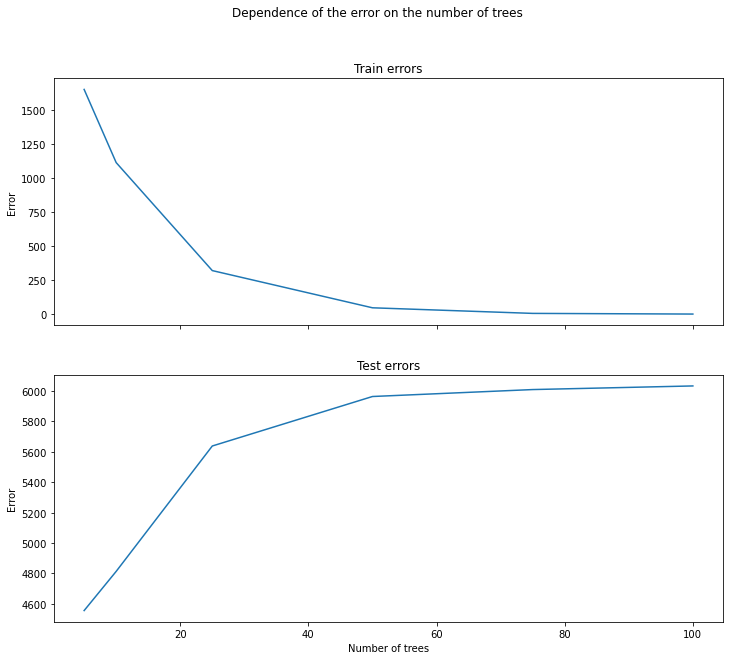

In [27]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
fig.suptitle('Dependence of the error on the number of trees')
ax1.plot(n_trees_list, train_err_history)
ax2.plot(n_trees_list, test_err_history)
ax1.set_title("Train errors")
ax2.set_title("Test errors")
ax2.set_xlabel('Number of trees')
ax1.set_ylabel('Error')
ax2.set_ylabel('Error')
plt.show()

#### Вывод: при увеличении числа деревьев в ансамбле модель начинает переобучаться: ошибка на трейновой выборке падает практически вплоть до 0, а на тестовой выборке ошибка в это же время растет.

In [15]:
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depths = [2, 4, 6, 8, 10]

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Шаг
eta = 1

train_err_history_depth = []
test_err_history_depth = []

for max_depth in max_depths:    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    train_err_history_depth.append(mean_squared_error(y_train, train_prediction))
    test_err_history_depth.append(mean_squared_error(y_test, test_prediction))

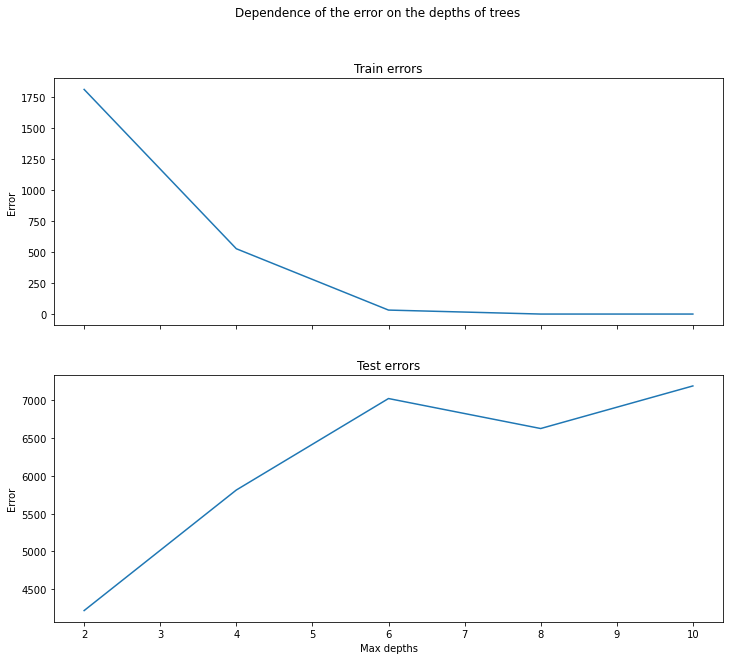

In [26]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
fig.suptitle('Dependence of the error on the depths of trees')
ax1.plot(max_depths, train_err_history_depth)
ax2.plot(max_depths, test_err_history_depth)
ax1.set_title("Train errors")
ax2.set_title("Test errors")
ax2.set_xlabel('Max depths')
ax1.set_ylabel('Error')
ax2.set_ylabel('Error')
plt.show()

#### Вывод: при увеличении максимальной глубины деревьев в бустинге модель начинается переобучаться. Ситуация аналогичная как при увеличении количества деревьев. Мы усложняем модель, она теряет обобщающую способность и сильно подстраивается под трейновую выборку, поэтому видим, как ошибка на трейновой выборке падает вплоть до 0, а не тестовой выборке ошибка растет.

#### Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Функцию gb_predict оставим, чтобы находить ошибку на всей train и test выборке.

Для реализации стохастического градиентного бустинга изменим эту функцию следующим образом:
1. берем половину выборки от X_train и в том же соответствии y_train
2. подсчитываем смещение
3. возвращаем новое X_train и смещение

На этих данных обучаем новое дерево.

In [33]:
def sgb_step(X, y, trees_list, coef_list, eta):
    idx_sgb = np.arange(X_train.shape[0])
    np.random.shuffle(idx_sgb)
    idx_sgb = idx_sgb[:len(idx_sgb) // 2]
    
    y_sgb = y[idx_sgb]
    X_sgb = X[idx_sgb]
    
    y_pred = np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X_sgb])
    
    target = bias(y_sgb, y_pred)
    
    return X_sgb, target

In [34]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции            
            X_new, target = sgb_step(X_train, y_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_new, target)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [30]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.1

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [31]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 55.73676217283655
Ошибка алгоритма из 50 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 3622.2547267750388


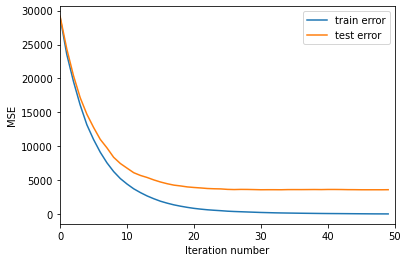

In [32]:
get_error_plot(n_trees, train_errors, test_errors)

Сравним стохастический градиентный бустинг с обычным градиентным бустингом, проведя эксперимент с точно такими же гиперпараметрами и изменяя количество деревьев.

In [35]:
# Число деревьев в ансамбле
n_trees_list = [5, 10, 25, 50, 75, 100]

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

train_err_history_sgb = []
test_err_history_sgb = []

for n_trees in n_trees_list:
    
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_trees
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    train_err_history_sgb.append(mean_squared_error(y_train, train_prediction))
    test_err_history_sgb.append(mean_squared_error(y_test, test_prediction))

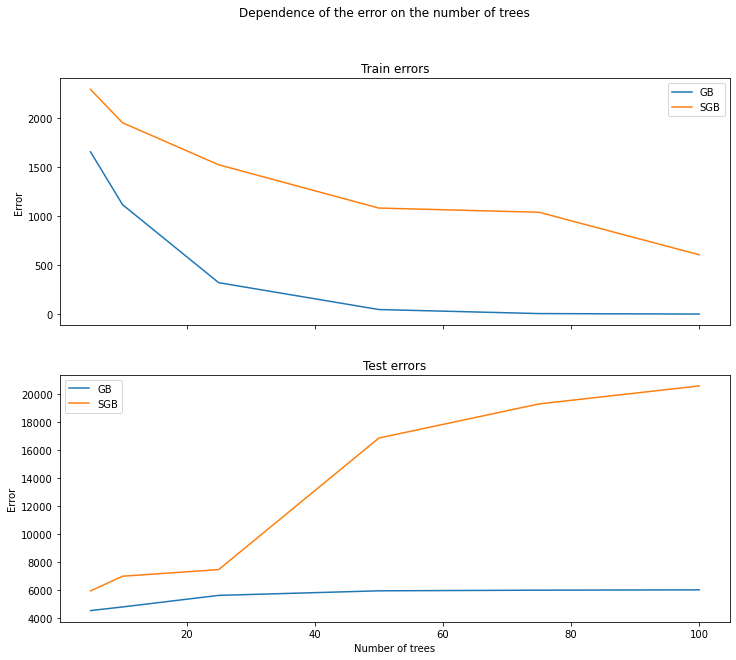

In [37]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
fig.suptitle('Dependence of the error on the number of trees')
ax1.plot(n_trees_list, train_err_history, label='GB')
ax2.plot(n_trees_list, test_err_history, label='GB')
ax1.plot(n_trees_list, train_err_history_sgb, label='SGB')
ax2.plot(n_trees_list, test_err_history_sgb, label='SGB')
ax1.set_title("Train errors")
ax2.set_title("Test errors")
ax2.set_xlabel('Number of trees')
ax1.set_ylabel('Error')
ax2.set_ylabel('Error')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

#### Мы видим, что модель на основе стохастического градиентного спуска показала более плохой результат. На тестовой выборке ошибка растет в разы быстрее. Модель не просто переобучается, а очень сильно теряет в качестве. При ансамбле из 100 деревьев ошибка на тестовой выборке при SGB в 5 раз выше чем при GB.